In [29]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [30]:
# Load clean data set
clean_data= pd.read_csv("/Users/sa20/Desktop/Music-Recommendation-Lab/Data/processed/clean_data.csv")
clean_data.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


## K-Means Clustering w/ No Scaling

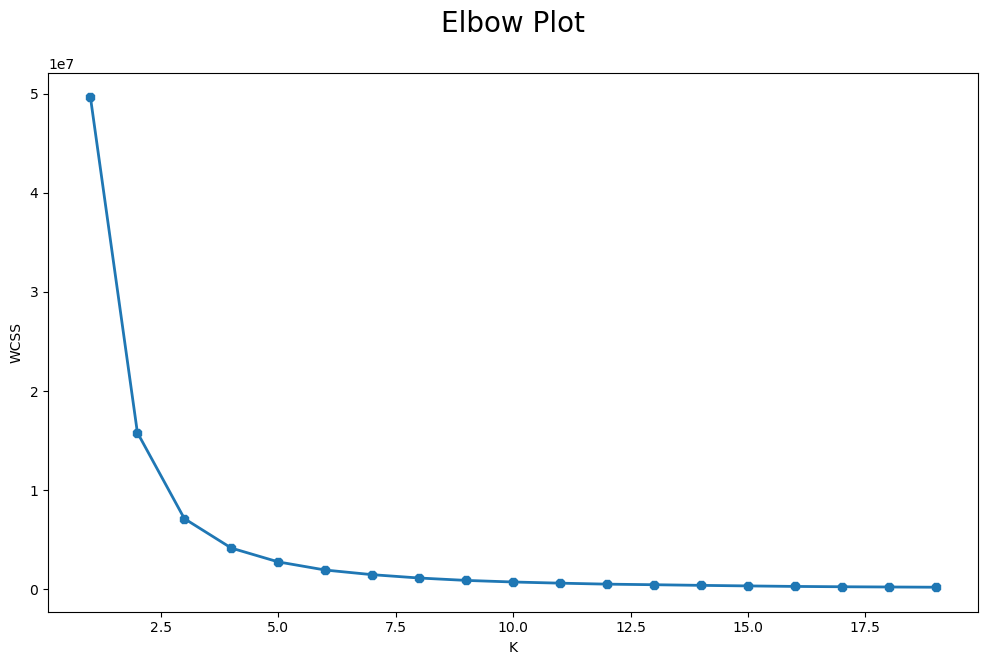

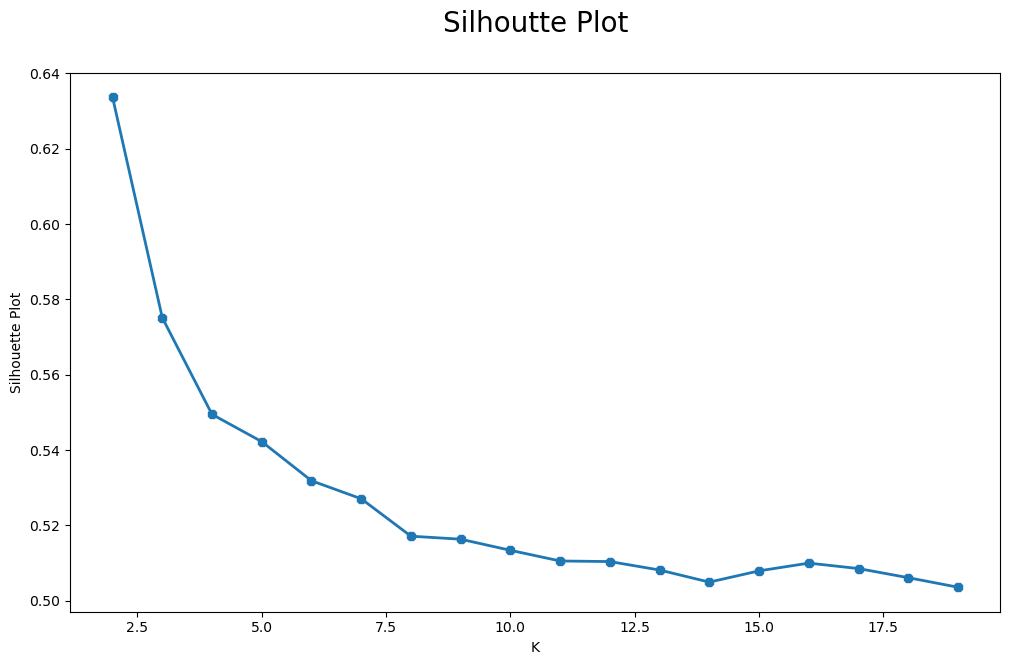

In [31]:
# Create an Elbow Plot of WCSS (within-cluster-sum-of-squares)


X1 = clean_data.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()



# Create a Silhoutte Score
silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))


plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Plot')
plt.show()

#### Based on our Elbow and Silhouette plot, our ideal number of clusters is k=4

In [105]:
# Make a Kmeans model to identify 4 unique clusters in the dataset
kmeans =  KMeans(n_clusters= 4, random_state= 42)


# Fit the KMeans model to 'X1' 
kmeans.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [106]:
labels= kmeans.fit_predict(X1)
labels

array([1, 3, 0, ..., 3, 3, 3], dtype=int32)

In [107]:
# Output of Centroids
kmeans.cluster_centers_

array([[3.42498444e+01, 2.13486962e-02, 9.46779985e-02, 1.41381949e-01,
        6.08756628e-02, 1.35034956e-02, 1.61291964e-02, 7.29629019e-02,
        8.24924532e-02, 4.17101657e-02, 7.06303433e-02, 3.14654092e-02,
        5.18502819e-02, 2.40997422e-02, 1.59506742e-01, 3.31241052e-02,
        5.05462708e-01],
       [1.04206047e+02, 2.01896261e-02, 1.47306219e-01, 1.06203190e-01,
        5.53340042e-02, 2.13334378e-02, 1.80546408e-02, 3.13014058e-02,
        7.15976090e-02, 1.22020537e-01, 5.26466705e-02, 5.91141716e-02,
        4.65577274e-02, 2.53046772e-02, 1.06468872e-01, 3.08235438e-02,
        3.47800469e-01],
       [1.65010211e+02, 1.79921707e-02, 1.12080663e-01, 7.25768432e-02,
        3.71850118e-02, 2.50734452e-02, 1.63057804e-02, 1.75166285e-02,
        6.33795880e-02, 3.20473518e-01, 3.52276822e-02, 6.76516709e-02,
        3.48665731e-02, 2.29470807e-02, 4.43391233e-02, 2.47649314e-02,
        3.03841291e-01],
       [6.56051690e+01, 2.23144823e-02, 1.26459192e-01, 1.239

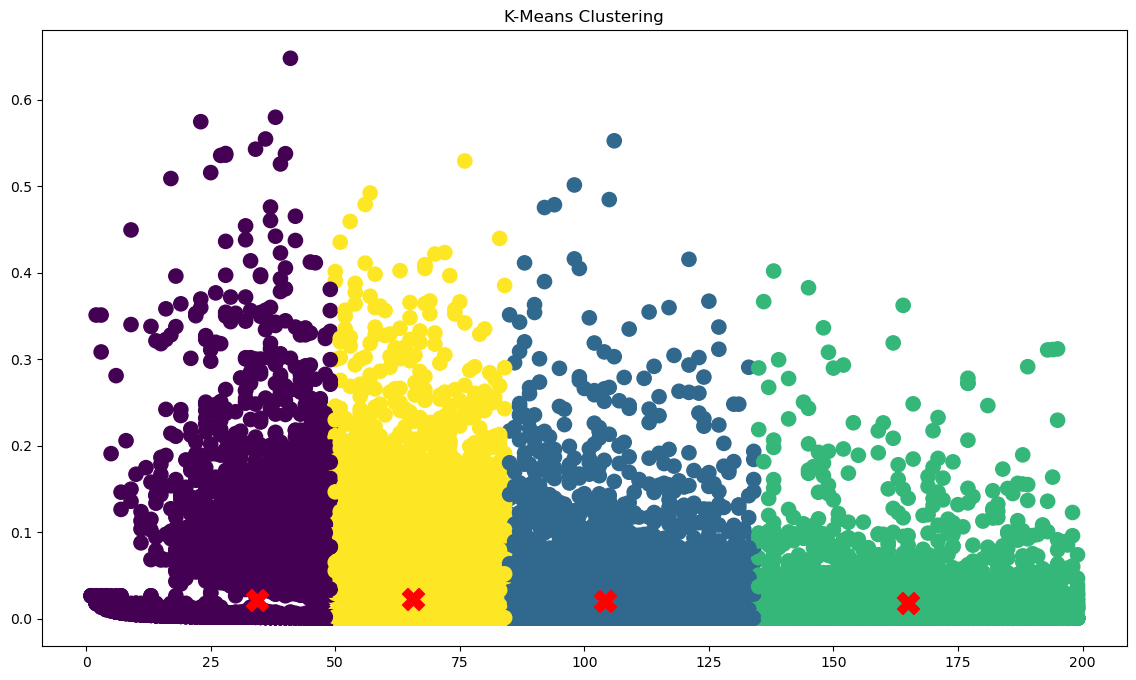

In [108]:
plt.figure(figsize=(14,8))
plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color= "red", s = 250, marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel('')
plt.ylabel('')
plt.show()

##### This graph demonstrates that we have 4 distinct clusters, but the grouping is not uniform as we don't know how many features were used in the clustering process

## K-Means Clustering Scaled

In [36]:
# Scaler makes sure variables have equal range
scaler = StandardScaler()

# Fit Kmeans object
X1_scaled = scaler.fit_transform(X1)

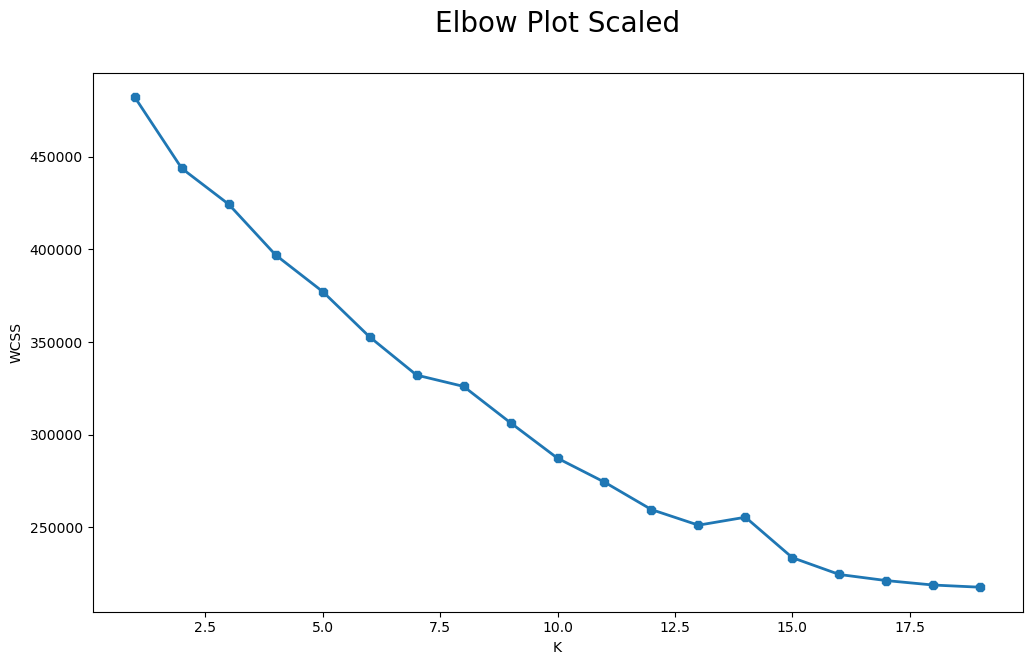

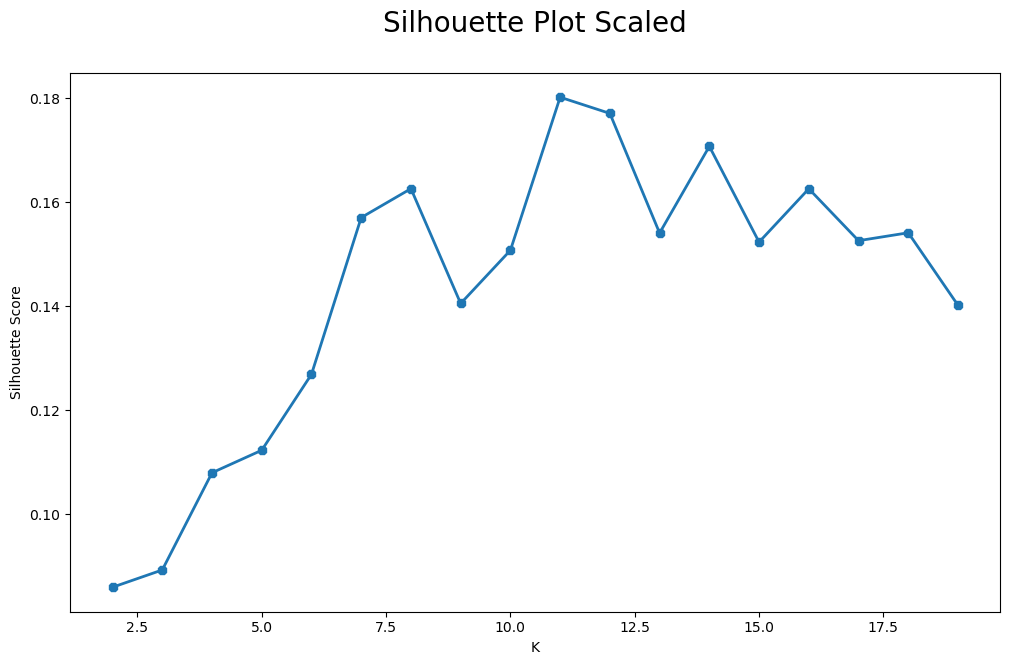

In [37]:
wcss_scaled = []

for k in range(1,20):

    kmeans = KMeans(n_clusters= k, init= "k-means++")

    kmeans.fit(X1_scaled)

    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize=(12,7))

plt.plot(range(1,20), wcss_scaled, linewidth= 2, marker ="8")
plt.title("Elbow Plot Scaled\n", fontsize= 20)
plt.xlabel('K')
plt.ylabel("WCSS")
plt.show()

# Create Silhouette Plot for Silhouette Score
silhouette_scaled = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters= k, init= "k-means++")

    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize=(12, 7))

plt.plot(range(2, 20), silhouette_scaled, linewidth= 2, marker='8')
plt.title('Silhouette Plot Scaled\n', fontsize=20)
plt.xlabel('K')
plt.ylabel("Silhouette Score")
plt.show()

#### After looking at the scaled elbow and silhouette plots, I went with k=12 as the optimal number of clusters

In [38]:
kmeans_scaled= KMeans(n_clusters=13, init="k-means++", n_init=50, random_state=42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=13, n_init=50, random_state=42)

In [39]:
# Label your Scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([ 7, 10,  0, ...,  5,  5,  5], dtype=int32)

In [40]:
# Output of Centroids
kmeans_scaled.cluster_centers_

array([[-2.10526501e-01, -1.31384983e-01, -4.57557211e-01,
        -4.08359796e-01, -2.16611166e-01, -1.72851208e-01,
        -4.45843631e-02, -1.94822022e-01, -7.06969576e-02,
        -3.86201309e-01,  2.92503566e+00,  1.39958394e-01,
        -1.17018665e-02, -5.88634808e-02, -3.78299469e-01,
        -1.39406142e-01,  3.97980128e-01],
       [-2.58946432e-01, -1.85932725e-01, -4.23809354e-01,
         1.85597919e+00, -2.13922844e-01, -1.86179527e-01,
        -1.60469081e-01, -1.59946470e-01,  1.28986254e-01,
        -4.04575858e-01, -2.52538044e-01,  2.01491983e-03,
        -1.61547252e-01, -1.20635564e-01, -3.36667371e-01,
        -9.58865599e-02,  6.23809870e-02],
       [ 1.76617680e-01, -3.53502349e-02, -1.71672201e-02,
        -1.01541408e-01, -1.15905514e-01,  4.18134942e+00,
        -1.13667865e-01, -1.70171108e-01, -2.45335569e-01,
         1.79004642e-01, -1.86464501e-01, -2.04748456e-01,
        -2.52457198e-01, -1.52445878e-01, -2.25769295e-01,
        -7.50533330e-02, -2.0

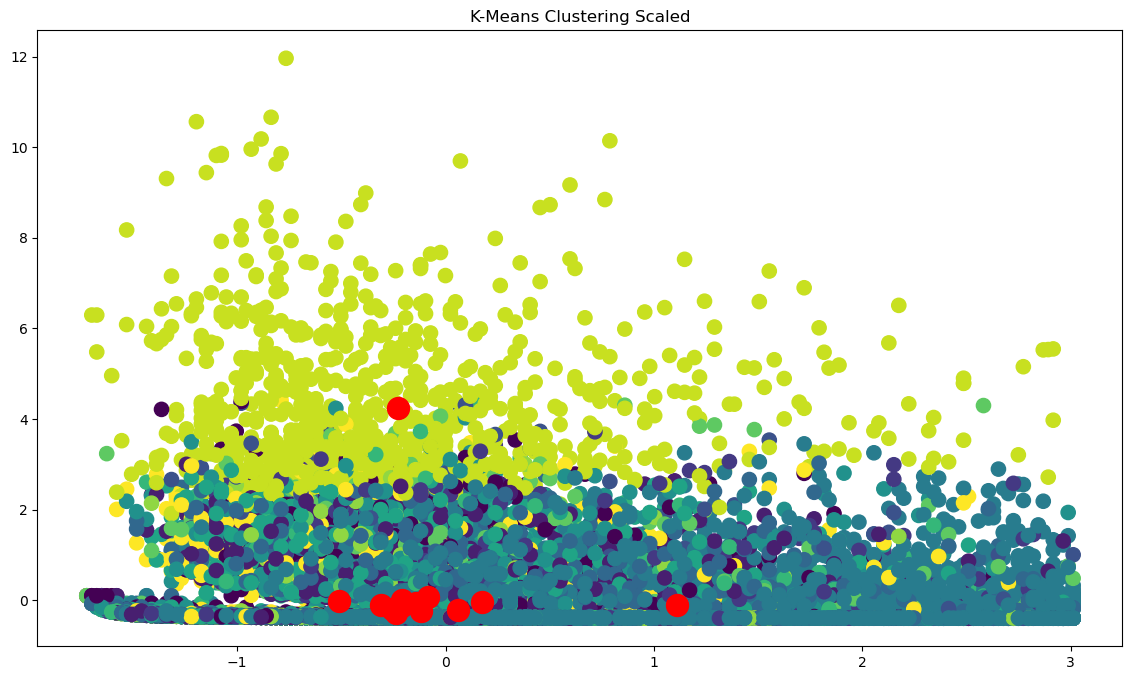

In [41]:
plt.figure(figsize=(14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s=105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color="red", s=250)
plt.title('K-Means Clustering Scaled')
plt.xlabel('')
plt.ylabel('')
plt.show()

##### After scaling, our clusters are non-existent or it appears to be that way due to an exceesive amount of overlapping making it hard to interpret what exactly it is that I'm looking at

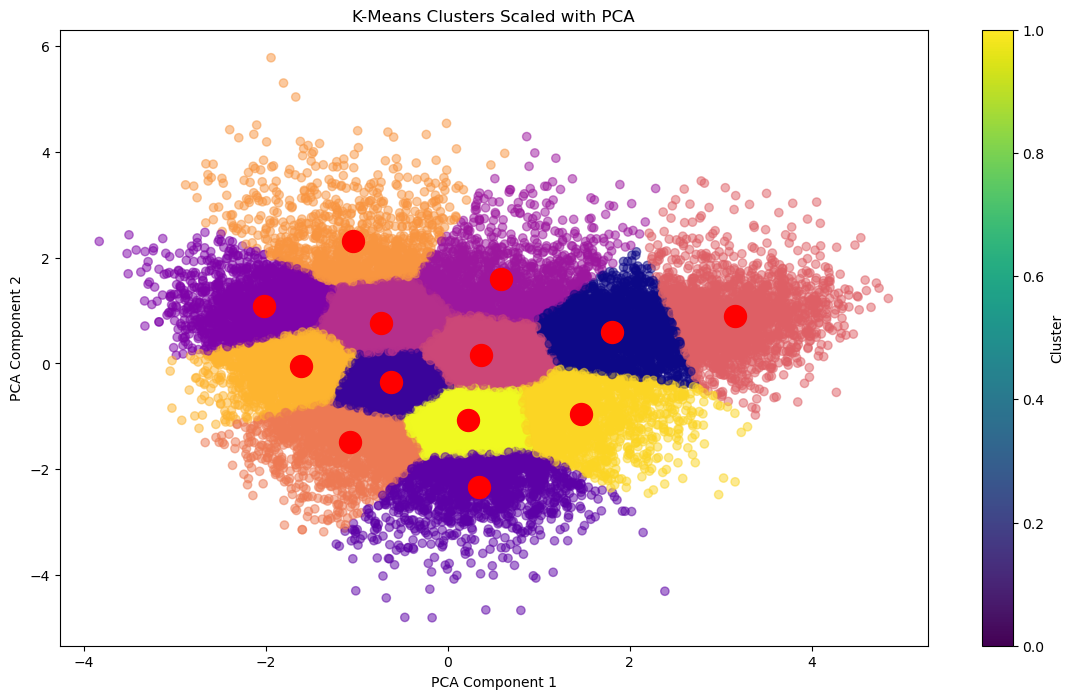

In [42]:
# Set-up PCA and Standardize data
pca = PCA(n_components=2)
x_pca= pca.fit_transform(X1_scaled)

clusters = kmeans_scaled.fit_predict(x_pca)

# Plot
plt.figure(figsize=(14, 8))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = clusters, cmap="plasma", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color="red", s=250)
plt.title("K-Means Clusters Scaled with PCA")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

##### PCA helped us achieve our much desired result as we can clearly see twelve distinct clusters! Each point represents a song and each one of our twelve clusters is represented by a different color

In [43]:
# Add "Cluster" column to clean dataset, use scaled data KMeans with scaled data that was visualized with PCA
clean_data['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [44]:
# Load the raw dataset, then add categorical columns to clean dataset
raw_data= pd.read_csv("/Users/sa20/Desktop/Music-Recommendation-Lab/Data/raw/train.csv")

label = raw_data[['genre', 'artist_name', 'track_name', 'release_date']]

label= pd.concat([label, clean_data], axis=1)

label

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,7
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,10
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,12
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,5
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,5
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,5
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,5


In [45]:
# Explore value count of each cluster
clean_data['Cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,2031
1,4084
2,859
3,802
4,4266
5,4111
6,1732
7,4607
8,1030


In [46]:
# Investigate clusters
label[clean_data['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
23453,rock,frankie laine,that ain't right,1957,62,0.000835,0.000835,0.000835,0.065242,0.000835,...,0.100216,0.000835,0.262633,0.000835,0.167483,0.000835,0.307053,0.000835,0.900000,0
4650,pop,the presidents of the united states of america,video killed the radio star,1998,60,0.001284,0.288399,0.001284,0.132008,0.001284,...,0.001284,0.001284,0.307040,0.001284,0.001284,0.084387,0.101049,0.045977,0.314286,0
21749,reggae,ziggy marley & the melody makers,all you got,1992,78,0.001074,0.001074,0.148015,0.001074,0.001074,...,0.001074,0.058295,0.403954,0.001074,0.040232,0.106370,0.001074,0.001074,0.400000,0
10736,country,guy clark,black diamond strings,1995,81,0.000741,0.189057,0.014393,0.050920,0.000741,...,0.000741,0.000741,0.312959,0.364694,0.000741,0.000741,0.000741,0.044721,0.357143,0
3067,pop,pat benatar,we belong,1984,111,0.000554,0.036301,0.000554,0.039681,0.000554,...,0.219936,0.021293,0.361085,0.000554,0.186584,0.000554,0.116285,0.000554,0.514286,0
14759,blues,"crosby, stills, nash & young",clear blue skies,1988,60,0.000923,0.099442,0.041362,0.043216,0.049964,...,0.037854,0.000923,0.335915,0.000923,0.192885,0.000923,0.108435,0.081694,0.457143,0
3605,pop,bob dylan,ring them bells,1989,83,0.000993,0.082580,0.116669,0.115431,0.000993,...,0.000993,0.000993,0.342006,0.095268,0.000993,0.072824,0.122124,0.000993,0.442857,0
8103,country,waylon jennings,"woman, let me sing you a song",1967,35,0.033432,0.001595,0.001595,0.001595,0.033075,...,0.209949,0.001595,0.406628,0.102355,0.001595,0.001595,0.001595,0.001595,0.757143,0
24126,rock,southside johnny and the asbury jukes,havin' a party,1976,83,0.098535,0.000721,0.000721,0.121270,0.047850,...,0.000721,0.182183,0.370925,0.000721,0.115816,0.000721,0.000721,0.054769,0.628571,0
4102,pop,frank black,i heard ramona sing,1993,51,0.001504,0.001504,0.001504,0.200386,0.001504,...,0.111167,0.001504,0.301860,0.326545,0.038990,0.001504,0.001504,0.001504,0.385714,0


In [109]:
clean_data['Cluster'].value_counts().sort_index().to_frame(name='Number of Songs')

,Number of Songs
Cluster,
0,2031
1,4084
2,859
3,802
4,4266
5,4111
6,1732
7,4607
8,1030


In [111]:
# Define the column names for the dataset
columns = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
           'family/gospel', 'romantic', 'communication', 'obscene', 'music',
           'movement/places', 'light/visual perceptions', 'family/spiritual',
           'sadness', 'feelings', 'age']


# Create a DataFrame of the cluster centers  
cluster_centers = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=columns)


# Label the index with the cluster names
cluster_centers.index = [f"Cluster {i}" for i in range(len(cluster_centers))]
cluster_centers


,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,-0.210527,-0.131385,-0.457557,-0.408360,-0.216611,-0.172851,-0.044584,-0.194822,-0.070697,-0.386201,2.925036,0.139958,-0.011702,-0.058863,-0.378299,-0.139406,0.397980
Cluster 1,-0.258946,-0.185933,-0.423809,1.855979,-0.213923,-0.186180,-0.160469,-0.159946,0.128986,-0.404576,-0.252538,0.002015,-0.161547,-0.120636,-0.336667,-0.095887,0.062381
Cluster 2,0.176618,-0.035350,-0.017167,-0.101541,-0.115906,4.181349,-0.113668,-0.170171,-0.245336,0.179005,-0.186465,-0.204748,-0.252457,-0.152446,-0.225769,-0.075053,-0.205987
Cluster 3,-0.141065,-0.054024,-0.079612,-0.079721,-0.075544,-0.079137,4.398427,-0.096346,-0.258847,-0.088383,-0.044645,-0.100924,-0.291374,-0.080235,-0.124558,-0.102552,0.280731
Cluster 4,0.058015,-0.225695,1.838018,-0.370660,-0.224057,-0.166935,-0.154628,-0.260908,0.051371,-0.379461,-0.300380,0.131569,-0.165470,-0.056996,-0.402838,-0.144626,-0.282177
Cluster 5,1.111549,-0.113509,-0.344118,-0.452734,-0.279724,0.020261,-0.107495,-0.331459,-0.056947,2.058520,-0.301552,0.296522,-0.283561,-0.196980,-0.573690,-0.190914,-0.487058
Cluster 6,-0.210347,0.012136,-0.427246,-0.410084,3.108165,-0.079824,-0.128358,-0.167749,0.055739,-0.352347,-0.237435,0.009001,-0.146647,-0.220811,-0.380236,-0.045066,0.070773
Cluster 7,-0.310618,-0.113478,-0.443165,-0.363021,-0.197559,-0.182482,-0.161515,-0.132020,0.255088,-0.415640,-0.250218,-0.093660,-0.224480,-0.193677,1.759136,-0.125836,0.055406
Cluster 8,-0.116545,-0.230279,0.290292,0.130987,-0.223944,-0.140286,-0.042755,-0.244081,-0.329009,-0.274717,-0.037344,-0.218464,-0.170899,3.833486,-0.200124,-0.159813,0.081184
Cluster 9,-0.083843,0.063029,-0.384260,-0.345928,-0.128063,0.007489,-0.035101,-0.181071,0.025258,-0.304381,-0.233816,-0.089982,-0.204251,-0.166111,-0.355175,4.753723,0.110779


In [126]:
#Create a dictionary for top 3 features of each cluster
top_cluster_features = {}

# Loop through each cluster and get the top 3 features
for i in range(len(cluster_centers)):
    top_cluster_features[f"Cluster {i}"] = cluster_centers.iloc[i].sort_values(ascending=False).head(3).index.tolist()

top_cluster_features

{'Cluster 0': ['music', 'age', 'movement/places'],
 'Cluster 1': ['world/life', 'communication', 'age'],
 'Cluster 2': ['shake the audience', 'obscene', 'len'],
 'Cluster 3': ['family/gospel', 'age', 'music'],
 'Cluster 4': ['violence', 'movement/places', 'len'],
 'Cluster 5': ['obscene', 'len', 'movement/places'],
 'Cluster 6': ['night/time', 'age', 'communication'],
 'Cluster 7': ['sadness', 'communication', 'age'],
 'Cluster 8': ['family/spiritual', 'violence', 'world/life'],
 'Cluster 9': ['feelings', 'age', 'dating'],
 'Cluster 10': ['light/visual perceptions', 'age', 'violence'],
 'Cluster 11': ['dating', 'age', 'romantic'],
 'Cluster 12': ['romantic', 'age', 'communication']}

In [125]:
# Cluster 1
label[clean_data['Cluster'] == 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
6,pop,freestyle,opm medley: when i met you,1950,179,0.000483,0.000483,0.371817,0.040712,0.000483,...,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.123150,1.000000,1
15,pop,les paul,chicken reel,1951,199,0.000349,0.018417,0.391879,0.000349,0.025737,...,0.000349,0.000349,0.000349,0.000349,0.000349,0.000349,0.034922,0.026084,0.985714,1
34,pop,ghantasala,thunintha pin,1953,87,0.000877,0.000877,0.421309,0.057732,0.000877,...,0.181324,0.000877,0.034583,0.000877,0.024780,0.137959,0.000877,0.000877,0.957143,1
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,1
40,pop,lata mangeshkar,chandan ka palna resham ko dori,1954,19,0.003509,0.003509,0.791505,0.003509,0.003509,...,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.942857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28078,hip hop,killy,killamonjaro,2017,51,0.001385,0.001385,0.416293,0.001385,0.001385,...,0.087336,0.142589,0.001385,0.001385,0.001385,0.001385,0.001385,0.001385,0.042857,1
28302,hip hop,nappy roots,these walls (dirty mc edit),2019,66,0.001645,0.329733,0.430797,0.064963,0.001645,...,0.001645,0.001645,0.001645,0.057615,0.001645,0.001645,0.001645,0.001645,0.014286,1
28323,hip hop,young mc,bust a move,2019,10,0.004785,0.004785,0.732057,0.004785,0.004785,...,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.014286,1
28348,hip hop,q-tip,life is better,2019,36,0.001645,0.001645,0.440262,0.001645,0.001645,...,0.001645,0.205476,0.001645,0.001645,0.001645,0.001645,0.118270,0.049952,0.014286,1


In [119]:
# Cluster 4
label[clean_data['Cluster'] == 4]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
5,pop,perry como,round and round (with mitchell ayres and his o...,1950,98,0.001053,0.420685,0.001053,0.074078,0.001053,...,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.128292,0.001053,1.000000,4
17,pop,les paul,dark eyes,1951,182,0.000358,0.378119,0.030934,0.000358,0.025127,...,0.019481,0.093725,0.000358,0.135552,0.058951,0.000358,0.066822,0.043335,0.985714,4
18,pop,asha bhosle,kotha mukunda,1952,48,0.002024,0.432396,0.002024,0.002024,0.002024,...,0.463594,0.002024,0.002024,0.002024,0.002024,0.032489,0.002024,0.041156,0.971429,4
21,pop,ghantasala,avanee nee pathi,1952,104,0.000627,0.336365,0.110288,0.050451,0.000627,...,0.138306,0.000627,0.000627,0.054813,0.000627,0.026880,0.059252,0.037603,0.971429,4
41,pop,lata mangeshkar,le chal ri nindiya le chal hamen,1954,64,0.005848,0.764423,0.005848,0.005848,0.005848,...,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848,0.136161,0.005848,0.942857,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28139,hip hop,nappy roots,headz up,2018,86,0.001316,0.550538,0.001316,0.001316,0.001316,...,0.170095,0.079620,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.028571,4
28174,hip hop,hiphop tamizha,vaadi nee vaa,2018,101,0.000892,0.393803,0.000892,0.000892,0.000892,...,0.400713,0.000892,0.000892,0.000892,0.032638,0.000892,0.000892,0.000892,0.028571,4
28183,hip hop,kid frost,la raza,2018,45,0.002924,0.317707,0.002924,0.051202,0.002924,...,0.002924,0.002924,0.002924,0.145682,0.002924,0.077842,0.138057,0.002924,0.028571,4
28245,hip hop,blackalicious,paragraph president,2019,91,0.001422,0.301827,0.001422,0.001422,0.001422,...,0.157723,0.100973,0.001422,0.001422,0.110539,0.103739,0.001422,0.001422,0.014286,4


In [124]:
# Cluster 8
label[clean_data['Cluster'] == 8]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
30,pop,lata mangeshkar,chupke chupke (from ''paying guest''),1953,32,0.004049,0.383725,0.055999,0.004049,0.004049,...,0.235733,0.004049,0.004049,0.004049,0.004049,0.263814,0.004049,0.004049,0.957143,8
68,pop,lata mangeshkar,antar mantar jantar,1956,45,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.389210,0.520808,0.068390,0.914286,8
120,pop,andy williams,a time for us,1957,36,0.002024,0.002024,0.354126,0.183738,0.002024,...,0.002024,0.002024,0.002024,0.002024,0.155916,0.134137,0.143743,0.002024,0.900000,8
130,pop,ghantasala,choopula kalasina subhavela,1957,109,0.134086,0.378816,0.000975,0.047355,0.000975,...,0.000975,0.000975,0.000975,0.000975,0.000975,0.151028,0.087490,0.096846,0.900000,8
147,pop,ghantasala,aagaya veedhiyil,1958,120,0.000612,0.562266,0.000612,0.000612,0.017189,...,0.085515,0.000612,0.000612,0.089242,0.000612,0.222890,0.014941,0.000612,0.885714,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27915,hip hop,blackface,boomyaka,2015,91,0.130202,0.112488,0.094023,0.001645,0.001645,...,0.001645,0.001645,0.432638,0.001645,0.001645,0.207622,0.001645,0.001645,0.071429,8
27967,hip hop,j. rawls,hha outro (joshy gets it),2016,65,0.002193,0.361588,0.257437,0.002193,0.002193,...,0.002193,0.002193,0.002193,0.100897,0.002193,0.247184,0.002193,0.002193,0.057143,8
28167,hip hop,talib kweli,ny weather report,2018,103,0.000774,0.327265,0.033128,0.000774,0.025469,...,0.000774,0.053441,0.107520,0.195229,0.071530,0.140322,0.000774,0.000774,0.028571,8
28273,hip hop,brand nubian,love vs. hate,2019,91,0.001053,0.355978,0.001053,0.050692,0.001053,...,0.238445,0.001053,0.052523,0.001053,0.001053,0.214589,0.001053,0.001053,0.014286,8


In [123]:
# Cluster 12
label[clean_data['Cluster'] == 12]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,12
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,12
8,pop,stélios kazantzídis,klapse me mana klapse me,1950,30,0.083537,0.002024,0.002024,0.248273,0.002024,...,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,1.000000,12
14,pop,les paul,the carioca,1951,60,0.001253,0.001253,0.081360,0.001253,0.001253,...,0.001253,0.001253,0.111922,0.001253,0.270507,0.001253,0.001253,0.049285,0.985714,12
22,pop,ghantasala,ee jagamantha natika,1952,41,0.038509,0.001645,0.001645,0.129280,0.103838,...,0.264269,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.049252,0.971429,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27201,rock,sufjan stevens,visions of gideon,2017,75,0.002506,0.002506,0.002506,0.193233,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.298167,0.002506,0.002506,0.002506,0.042857,12
27444,rock,x ambassadors,hold you down,2019,105,0.000650,0.000650,0.000650,0.000650,0.014014,...,0.096180,0.028403,0.000650,0.113532,0.278850,0.100134,0.000650,0.000650,0.014286,12
27790,hip hop,night shield,"monsters (cruelty 5) (feat. frank waln, young ...",2012,22,0.002288,0.002288,0.002288,0.110016,0.002288,...,0.181793,0.002288,0.119344,0.002288,0.002288,0.002288,0.041195,0.192486,0.114286,12
27972,hip hop,t-rock,4:20/reincarnated,2016,167,0.010711,0.198028,0.000424,0.026117,0.034067,...,0.000424,0.103046,0.000424,0.075902,0.028440,0.000424,0.000424,0.060376,0.057143,12


## New Sample Prediction: K-Means Clustering Scaled 

In [51]:
# Load new_sample data set
test_path = r"/Users/sa20/Desktop/Music-Recommendation-Lab/Data/raw/recommend.csv"
new_sample_test = pd.read_csv(test_path)
new_sample_test.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [92]:
# Remove columns we will not be using
clean_sample_test = new_sample_test.drop(["artist_name", "genre", "like/girls", "lyrics", "topic", "track_name", "release_date", "Unnamed: 0"], axis=1)
clean_sample_test.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429


In [93]:
# Using previous test dataset 
Y1 = clean_sample_test.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

# Scaling new sample data
scaler = StandardScaler()
Y1_scaled = scaler.fit_transform(Y1)

# Fit KMeans Model
clean_sample_test['Cluster']= kmeans_scaled.predict(Y1_scaled)

In [94]:
clean_sample_test

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,2
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,3
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,11
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,12
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,8
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,5
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,7
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4


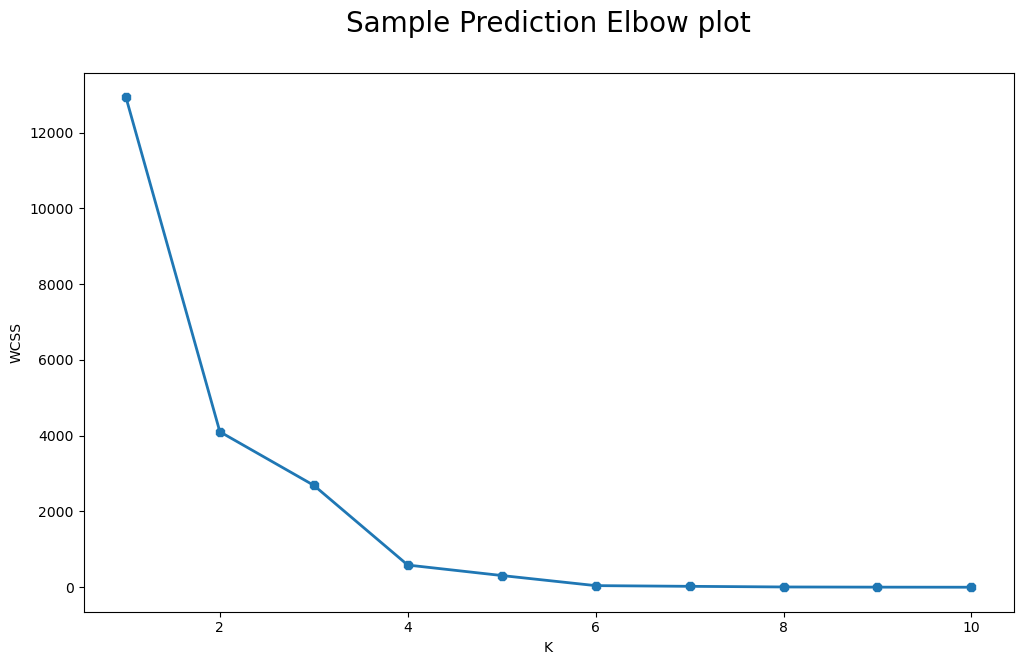

In [95]:
# Elbow plot
wcss_scaled2= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(Y1)
    wcss_scaled2.append(kmeans.inertia_)

# Plot
plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled2, linewidth = 2, marker = '8')
plt.title('Sample Prediction Elbow plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans_scaled2 = KMeans(n_clusters=3, init = "k-means++")
kmeans_scaled2.fit(Y1)

KMeans(n_clusters=3)

In [100]:
sample_label = new_sample_test[["artist_name", "genre","release_date", "track_name"]]
sample_label = pd.concat([sample_label, clean_sample_test], axis=1)

In [101]:
clean_sample_test['Cluster'].value_counts().sort_index().to_frame("Number of Songs")

,Number of Songs
Cluster,
2,1
3,1
4,1
5,1
6,2
7,1
8,1
11,1
12,1


### Cluster 6 is the only cluster with more than one song 

In [104]:
sample_label[clean_sample_test["Cluster"]== 6]

,artist_name,genre,release_date,track_name,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,dennis brown,reggae,1993,second chance,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
8,randy travis,country,1986,messin' with my mind,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6


In [103]:
sample_label[clean_sample_test["Cluster"]== 11]

,artist_name,genre,release_date,track_name,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3,jerry lee lewis,pop,1960,your cheating heart,25,0.20474,0.002506,0.002506,0.129818,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,11


### Cluster 6
 - len

 - violence

 - sadness 
 
 - world/life
 
### Cluster 11
 - age

 - sadness

 - dating 
 
 - night/time